In [1]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
list_data_x = []
list_data_dx = []
list_data_dy = []

In [3]:
N_SDR = 8
list_particle_number = []
for i in range(1,N_SDR+1):
    if i < 10:
        list_particle_number.append(("0"+str(i)))
    else:
        list_particle_number.append((str(i)))

In [4]:
#----------------------------
# 2. FLAC model parameters
#----------------------------
num_particles = 600        #number of particles for each SDR
time_steps = 400           #total FLAC model steps
dt_step = 20.*1000 #[yr] FLAC time step for data output
yr_in_Myr = 10.**6 #[yr]

Time_compare = .1 # [Myr]

for i in range(N_SDR):
    particle_number = list_particle_number[i]

    #----------------------------
    # 1. for getting FLAC data
    #----------------------------
    Plate_thickness = "21"     # Hd in the model
    # particle_number = "02"     # which SDR particle
    
    # Get data from FLAC
    #----------------------------
    FLAC_file_path=("/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20171208-nodike-high_infill/vts_files/H"
                    +Plate_thickness+"C")
    #FLAC_file_path=("/Users/Tian/Documents/Thesis"
    #                "/Vts_data/TianHe2/20170920/H"
    #                +Plate_thickness+"-withHealing")

    FLAC_data = open(FLAC_file_path+"/particles_"+particle_number+".0",'rb')
    data = np.fromfile(FLAC_data, dtype=np.single)
    FLAC_data.close()
    data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
    data_matrix_x = data_matrix[:,0,:]
    data_matrix_y = data_matrix[:,1,:]

    data_dy = np.zeros(len(data_matrix_x[:,1]))
    data_dx = np.zeros(len(data_matrix_x[:,1]))
    data_x_dt = np.zeros(len(data_matrix_x[:,1]))


    time_data_comparison = Time_compare * yr_in_Myr 
    #[yr]  compare data at 1 Myr  (relative time, for SDR 10 at 10Myr is when it experience 1Myr of load)
    TIME = float(particle_number) + Time_compare - 1. 
    steps = int(np.ceil(TIME * yr_in_Myr / dt_step)) # the step in FLAC correspond to time_data_comparison
    steps_dt = steps + 1
    
    # fetch useful data at corresponding time
    print(steps)
    data_x = data_matrix_x[:,steps]
    data_y = data_matrix_y[:,steps]
    print(steps_dt)
    data_x_dt = data_matrix_x[:,steps_dt]
    data_y_dt = data_matrix_y[:,steps_dt]

    data_dy = data_y_dt - data_y
    data_dx = data_x_dt - data_x
    data_x_dt = data_x_dt
    
    list_data_x.append(data_x_dt[:])
    list_data_dx.append(data_dx[:])
    list_data_dy.append(data_dy[:])

6
7
55
56
105
106
155
156
205
206
255
256
305
306
355
356


In [5]:
465600/1200

388.0

In [6]:
FLAC_file_path

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20171208-nodike-high_infill/vts_files/H21C'

In [7]:
list_data_x[0][1]

3.5818393

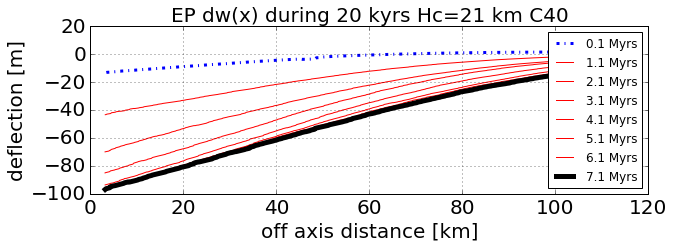

In [9]:
resources_path="/Users/Tian/Documents/Thesis_Columbia/!SDR_manuscript/manuscript-2018/figures/resources/"
fig = plt.gcf()
fig.set_size_inches(10, 3)

for i in range(N_SDR):
    #plt.plot(list_data_x[i],list_data_dy[i]*1000)
    if(i==0):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"b-.",linewidth="3",label="%d.1 Myrs"%i)
    elif(i==N_SDR-1):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"k-",linewidth="5",label="%d.1 Myrs"%i)
    else:
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"r-",linewidth="1",label="%d.1 Myrs"%i)
plt.legend()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.grid()
plt.title("EP dw(x) during 20 kyrs Hc=21 km C40",fontsize=20)
plt.xlabel("off axis distance [km]",fontsize=20)
plt.ylabel("deflection [m]",fontsize=20)
plt.show()
fig.savefig(resources_path+'EP-H21-C40.pdf', dpi=300)

In [10]:
#for i in range(5,10):
    #plt.plot(list_data_x[i],list_data_dy[i])
#fig0,=plt.plot(list_data_x[0],list_data_dy[0],label="0")
#fig1,=plt.plot(list_data_x[3],list_data_dy[3],label="3")
fig2,=plt.plot(list_data_x[7],list_data_dy[7],label="5Myr")
fig3,=plt.plot(list_data_x[5],list_data_dy[5],label="6Myr")
#fig4,=plt.plot(list_data_x[1],list_data_dy[1],label="1")
#plt.plot(list_data_x[7],list_data_dy[7])
plt.legend()

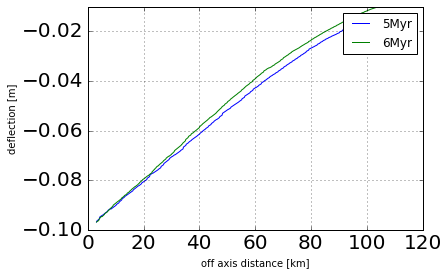

In [11]:
plt.grid()
plt.xlabel("off axis distance [km]")
plt.ylabel("deflection [m]")
plt.show()

In [12]:
len(list_data_dy)

8

In [13]:
xx = [item[2] for item in list_data_x]

In [14]:
# calculate the average x locations of the SDRs that is nearest to axis
xx_avg = sum(xx)/len(xx)*1000.
xx_avg

3520.683765411377

In [15]:
dw0 = [item[2] for item in list_data_dy]

In [16]:
dw0 = np.array(dw0)

In [17]:
dw0*1000

array([-12.88716507, -42.90592575, -69.73019409, -84.65653992,
       -93.34093475, -96.55433655, -96.43852997, -96.23277283], dtype=float32)

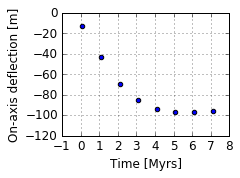

In [18]:
fig = plt.gcf()
fig.set_size_inches(3, 2.2)
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

plt.scatter(([0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1]), dw0*1000)
plt.grid()
plt.xlabel("Time [Myrs]", fontsize=12)
plt.ylabel("On-axis deflection [m]", fontsize=12)
plt.show()
fig.savefig(resources_path+'EP-H21-C40-axis.pdf', dpi=300)

In [20]:
# take the steady dw0 and calc the average (from 3)
N_steady = 5 # from the figure plot
dw0_avg = sum(dw0[N_steady:]) / len(dw0[N_steady:]) * 1000
dw0_avg

-96.408545970916748

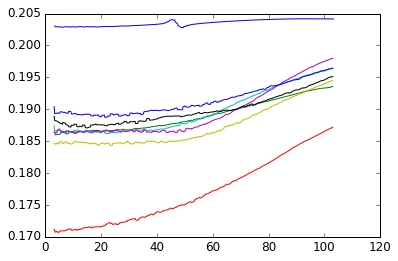

In [21]:
for i in range(N_SDR):
    plt.plot(list_data_x[i],list_data_dx[i])
plt.show()

In [22]:
int(Plate_thickness)*1000.

21000.0

In [23]:
# compare with analytic results
Hd = int(Plate_thickness)*1000.;              #[m] height of the dike
Te = int(Plate_thickness)*1000.;              #[m] effective plate thickness
g = 10.;                 #[m/s**2] gravitational acceleration
rho_d = 3000.;           #[kg/m**3] density of the solidified dike
rho_f = 2800.;           #[kg/m**3] density of the fluid dike
delta_rho_d = rho_d - rho_f;
rho_i_sedi = 2300.;
rho_i = 2800.;           #[kg/m**3] density of the infill
rho_c = 3000.;           #[kg/m**3] density of the underlying lower crust or mantle
sediment = 0;  # whether infill is sedi or lava  (1 means sedi)
if sediment == 1:
    delta_rho_c = rho_c - rho_i_sedi;
else:
    delta_rho_c = rho_c - rho_i;


E = 7.5 * 10.**10.;          #[Pa] Young's modulus; for lame constants of 30GPa
mu = 0.25;              # Poisson's ratio
D = (E * Te**3.) / (12 * (1 - mu**2.)); #[N*m] Flexural rigidity
alpha = (4. * D / (delta_rho_c * g))**0.25;#[m] Flexural wavelength
dx = dt_step / yr_in_Myr * 10. * 1000.  # [m] width of dike injection within one dt of 20kyr
dV_0 = dx * g * Hd * delta_rho_d; #[N/m] volcanic line load due to denser dike
dW_0 = 2 * dV_0 / (alpha * g * delta_rho_c)

In [24]:
dx

200.0

In [25]:

dW_0

79.6856520746051

In [26]:
alpha

105414.20922471164

In [27]:
np.exp(-xx_avg / alpha)* np.cos(xx_avg / alpha)

0.96661364307609698

In [28]:
dw0_avg

-96.408545970916748

In [29]:
# # using scypy to solve
# import sympy as sp
# from sympy.solvers import solve
# from sympy import Symbol
# alpha_n = Symbol('alpha_n')
# eq = dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
#     * sp.exp(-xx_avg / alpha_n) * sp.cos(xx_avg / alpha_n)
# solve(eq, alpha_n)

In [30]:
dw0_avg

-96.408545970916748

In [31]:
xx_avg

3520.683765411377

In [32]:
dV_0

8400000000.0

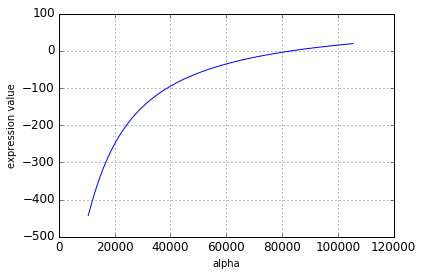

In [33]:
from scipy.optimize import fsolve
func = lambda alpha_n: \
        -dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
         * np.exp(-xx_avg / alpha_n) * np.cos(xx_avg / alpha_n)
#plot
# Plot it

alpha_n = np.linspace(alpha/10, alpha, 201)

plt.plot(alpha_n, func(alpha_n))
plt.xlabel("alpha")
plt.ylabel("expression value")
plt.grid()
plt.show()

alpha_n_initial_guess = alpha
alpha_n_solution = fsolve(func, alpha_n_initial_guess)

In [34]:
alpha_n_solution

array([ 83455.6843464])

In [35]:
Te_n = (alpha_n_solution / (E / (3*delta_rho_c*g*(1-mu**2)))**0.25)**(4/3.)

In [36]:
Te_n

array([ 15380.18826089])

In [37]:
H = [0,6,8,10,12,15,18,21]
HH = [0,21]

In [38]:
Te = [0,2.832,4.164,5.545,7.325,9.530,12.243,15.076]
TeC = [0,2.992,4.547,6.062,7.558,10.073,12.754,15.552]

In [39]:
polyP = np.polyfit(H,Te,3)
polyP_func = np.poly1d(polyP)
polyPC = np.polyfit(H,TeC,3)
polyPC_func = np.poly1d(polyPC)

In [40]:
polyP

array([-0.00036021,  0.0253972 ,  0.34259101, -0.01260571])

In [41]:
xp = np.linspace(0,22,500)
Tep = polyP_func(xp)
TepC = polyPC_func(xp)

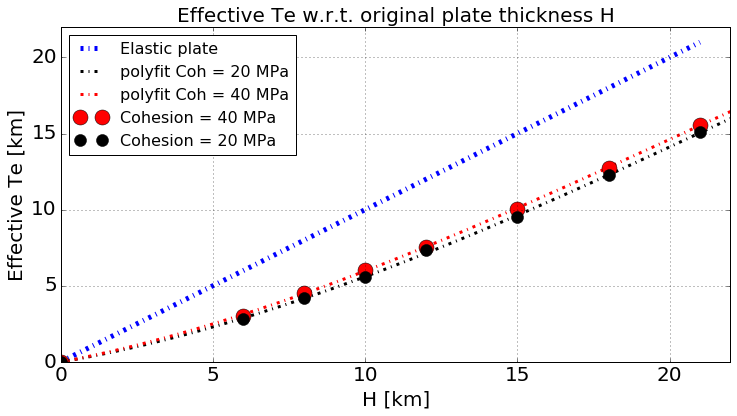

In [53]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'b-.',linewidth=5,label="Elastic plate")

plt.plot(xp,Tep,'k-.',linewidth=3,label="polyfit Coh = 20 MPa")
plt.plot(xp,TepC,'r-.',linewidth=3,label="polyfit Coh = 40 MPa")
plt.plot(H,TeC,'ro',markersize=15,label="Cohesion = 40 MPa")
plt.plot(H,Te,'ko',markersize=12,label="Cohesion = 20 MPa" )


plt.title("Effective Te w.r.t. original plate thickness H",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("Effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,22, 0, 22])
plt.legend(loc=2,fontsize=16)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'EP-Te_H-$.pdf', dpi=300)

In [43]:
pwd

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20170920/python-scripts'

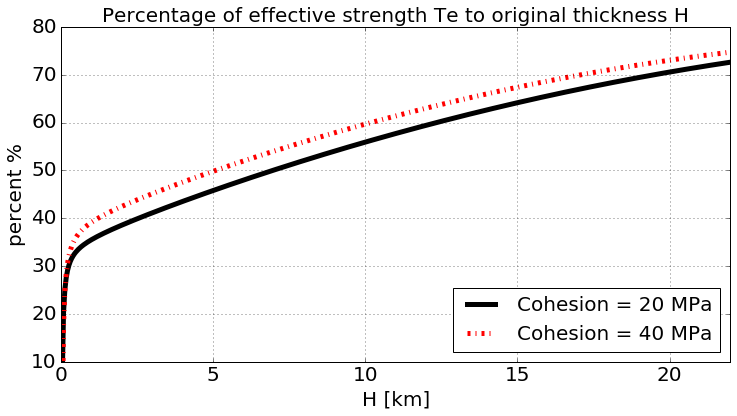

In [55]:
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.plot(xp[1:],Tep[1:]/xp[1:]*100,'k-',linewidth=5,label="Cohesion = 20 MPa")
plt.plot(xp[1:],TepC[1:]/xp[1:]*100,'r-.',linewidth=5,label="Cohesion = 40 MPa")
plt.title("Percentage of effective strength Te to original thickness H",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("percent %",fontsize=20)
plt.grid()
plt.axis([0,22, 10, 80])
plt.legend(loc=4,fontsize=20)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'EP-Te_H_percentage-$.pdf', dpi=300)

In [98]:
# Get data for SDR Te data
#----------------------------
SDR_file_path=("/Users/Tian/Documents/Thesis_Columbia/!SDR_manuscript/"+
               "Real-Data_analysis/global_Te/gmt/global-SDRs/etopo5/")

SDR_data = open(SDR_file_path+"data.txt",'r')

#print(SDR_data.read())
Te_data = np.genfromtxt(SDR_file_path+"data.txt", delimiter=" ")
#Te_data = np.fromfile(SDR_data, dtype=np.single)
SDR_data.close()
#data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
#data_matrix_x = data_matrix[:,0,:]

In [99]:
Te_data

array([[ -57.   ,  -42.   ,    3.6  ],
       [ -58.   ,  -43.   ,    3.6  ],
       [ -56.   ,  -41.   ,    2.5  ],
       [ -55.   ,  -40.   ,    1.4  ],
       [ -52.   ,  -37.   ,    1.9  ],
       [ -57.5  ,  -43.8  ,    4.8  ],
       [ -57.   ,  -43.5  ,    6.9  ],
       [ -57.   ,  -43.   ,    8.3  ],
       [ -56.5  ,  -42.5  ,    4.8  ],
       [ -57.   ,  -41.5  ,    6.2  ],
       [ -42.   ,   62.   ,    4.8  ],
       [   3.   ,   67.2  ,    1.4  ],
       [   5.   ,   66.   ,    7.6  ],
       [  -0.5  ,   63.   ,    2.5  ],
       [ -42.   ,   61.   ,    7.6  ],
       [  66.   ,   20.   ,   10.7  ],
       [ -55.   ,   40.5  ,    0.9  ],
       [ -75.   ,   36.   ,    6.2  ],
       [ -53.   ,  -35.   ,    3.6  ],
       [  16.   ,  -32.   ,    7.6  ],
       [  15.   ,  -29.   ,    7.6  ],
       [  12.5  ,  -14.5  ,    3.   ],
       [ -36.   ,  -12.   ,    0.726],
       [ -20.   ,   75.   ,    8.36 ],
       [ 115.   ,  -20.   ,    0.978],
       [ -52.   ,  -38.  

In [110]:
Te_all = Te_data[:,2]

In [122]:
Te_all

array([  3.6  ,   3.6  ,   2.5  ,   1.4  ,   1.9  ,   4.8  ,   6.9  ,
         8.3  ,   4.8  ,   6.2  ,   4.8  ,   1.4  ,   7.6  ,   2.5  ,
         7.6  ,  10.7  ,   0.9  ,   6.2  ,   3.6  ,   7.6  ,   7.6  ,
         3.   ,   0.726,   8.36 ,   0.978,   3.6  ,   4.869,   2.5  ,
         3.6  ,   3.6  ,   1.5  ])

In [121]:
len(Te_all)

31

In [131]:
list_Te_flac = []

for i in range(len(Te_all)):
    for H in (polyP_func - Te_all[i]).roots:
        if H < 30 and H>0:
            #print(H)
            list_Te_flac.append(H)

In [152]:
len(list_Te_flac)
array_Te_flac = np.array(list_Te_flac)

In [159]:
array_Te_flac

array([  7.14443   ,   7.14443   ,   5.36365697,   3.33690471,
         4.29724423,   8.90813497,  11.70580798,  13.43407053,
         8.90813497,  10.8052957 ,   8.90813497,   3.33690471,
        12.58082399,   5.36365697,  12.58082399,  16.2326787 ,
         2.28826253,  10.8052957 ,   7.14443   ,  12.58082399,
        12.58082399,   6.19694898,   1.8964827 ,  13.50629656,
         2.45891649,   7.14443   ,   9.00520201,   5.36365697,
         7.14443   ,   7.14443   ,   3.53517547])

In [162]:
np.shape(np.transpose(array_Te_flac))

(31,)

In [158]:
Te_data

array([[ -57.   ,  -42.   ,    3.6  ],
       [ -58.   ,  -43.   ,    3.6  ],
       [ -56.   ,  -41.   ,    2.5  ],
       [ -55.   ,  -40.   ,    1.4  ],
       [ -52.   ,  -37.   ,    1.9  ],
       [ -57.5  ,  -43.8  ,    4.8  ],
       [ -57.   ,  -43.5  ,    6.9  ],
       [ -57.   ,  -43.   ,    8.3  ],
       [ -56.5  ,  -42.5  ,    4.8  ],
       [ -57.   ,  -41.5  ,    6.2  ],
       [ -42.   ,   62.   ,    4.8  ],
       [   3.   ,   67.2  ,    1.4  ],
       [   5.   ,   66.   ,    7.6  ],
       [  -0.5  ,   63.   ,    2.5  ],
       [ -42.   ,   61.   ,    7.6  ],
       [  66.   ,   20.   ,   10.7  ],
       [ -55.   ,   40.5  ,    0.9  ],
       [ -75.   ,   36.   ,    6.2  ],
       [ -53.   ,  -35.   ,    3.6  ],
       [  16.   ,  -32.   ,    7.6  ],
       [  15.   ,  -29.   ,    7.6  ],
       [  12.5  ,  -14.5  ,    3.   ],
       [ -36.   ,  -12.   ,    0.726],
       [ -20.   ,   75.   ,    8.36 ],
       [ 115.   ,  -20.   ,    0.978],
       [ -52.   ,  -38.  

In [157]:
np.shape(Te_data)
#np.shape(list_Te_flac)

(31, 3)

In [171]:
num_column = np.shape(Te_data)[1]+1
num_row = np.shape(Te_data)[0]

In [191]:
Te_data_flac = np.zeros(np.shape(Te_data))

In [176]:
Te_data_all = np.zeros((num_row,num_column))

In [180]:
Te_data_all[:,0:3]  = Te_data

In [192]:
Te_data_flac[:,0:2] = Te_data[:,0:2]
Te_data_flac[:,2] = array_Te_flac

In [184]:
Te_data_all[:,3] = array_Te_flac

In [185]:
Te_data_all

array([[ -57.        ,  -42.        ,    3.6       ,    7.14443   ],
       [ -58.        ,  -43.        ,    3.6       ,    7.14443   ],
       [ -56.        ,  -41.        ,    2.5       ,    5.36365697],
       [ -55.        ,  -40.        ,    1.4       ,    3.33690471],
       [ -52.        ,  -37.        ,    1.9       ,    4.29724423],
       [ -57.5       ,  -43.8       ,    4.8       ,    8.90813497],
       [ -57.        ,  -43.5       ,    6.9       ,   11.70580798],
       [ -57.        ,  -43.        ,    8.3       ,   13.43407053],
       [ -56.5       ,  -42.5       ,    4.8       ,    8.90813497],
       [ -57.        ,  -41.5       ,    6.2       ,   10.8052957 ],
       [ -42.        ,   62.        ,    4.8       ,    8.90813497],
       [   3.        ,   67.2       ,    1.4       ,    3.33690471],
       [   5.        ,   66.        ,    7.6       ,   12.58082399],
       [  -0.5       ,   63.        ,    2.5       ,    5.36365697],
       [ -42.        ,   61.      

In [187]:
fname = 'Te_data_all.txt'
np.savetxt(fname, Te_data_all, delimiter=' ', newline='\n')

In [193]:
fname = 'Te_data_flac.txt'
np.savetxt(fname, Te_data_flac, delimiter=' ', newline='\n')